### Introduction

Training a deep learning model for optical character recognition (OCR) plays a vital role in the
retrieval of text or information from pixel-based images to searchable and machine-editable text
formats. OCR is applied in different domains, such as logistics, banking, healthcare, insurance,
and retail. They enable automated invoice processing, form recognition, identity verification,
license plate recognition, and other text-based tasks.


The task at hand is to train a deep learning model for Optical Character Recognition (OCR)
to read characters from images. `The objective is to develop an algorithm that can
accurately recognize a fixed number of digits ranging from 0 to 9.`  The model will be
provided with images, each containing exactly 5 digits. To address this problem, I generated
artificial images with corresponding labels indicating the correct digits. I split this dataset into
training and validation sets, build and train the deep learning model using the Keras library with
TensorFlow 2.5.0 and finally evaluate the model performance on a generated test set in which
the model has not been trained and this is to give an idea on how well the model generalizes to
new data. Finally, I evaluated its performance on the test set. The goal is to achieve the best
possible performance in terms of accuracy and reliability for the OCR algorithm.


### Approaching the problem
To address the problem at hand, the following approach was taken:

<ul>
   <li><b>Dataset Generation:</b> A large synthetic dataset of artificial images was created using the Python Imaging Library (PIL) and data augmentation techniques. Each image simulated a license plate and contained a set of 5 numbers. Since the dataset included labels, the problem was treated as a supervised learning task. The label for each image was a sequence of integers, representing the digits at specific positions in the image, ranging from 0 to 9.
   </li>


   <li><b>Dataset Split:</b> The dataset was divided into training and validation sets. The training set was utilized to train the deep learning model, while the validation set aided in tuning the model's hyperparameters. A separate testing set was generated to evaluate the performance of the trained model. </li>


   <li> <b>Architectural Choice:</b> A combination of Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) was employed. CNNs were utilized to extract relevant features from the images, while RNNs, specifically the Long Short-Term Memory (LSTM) variant, handled the processing of variable-length sequences for the labels. The chosen CNN-RNN architecture can be categorized as a one-to-many architecture. It takes an image as input and generates a sequence of characters or labels corresponding to the characters in the image.</li>


   <li><b>Training Process:</b> The model was trained using both the generated images and augmented images from the dataset. Different architectures and hyperparameters were experimented with to identify the best model for this task.</li>

   
</ul>


In [1]:
!pip install -r requirements.txt | grep -v "already satisfied"

In [2]:
!pytest -vv src/helpers.py -k test_generate_images

============================= test session starts ==============================
platform linux -- Python 3.8.8, pytest-7.1.1, pluggy-0.13.1 -- /home/ubuntu/anaconda3/bin/python
cachedir: .pytest_cache
rootdir: /home/ubuntu/OCR
plugins: anyio-2.2.0, typeguard-2.13.3
collected 4 items / 3 deselected / 1 selected                                  

src/helpers.py::test_generate_images PASSED                              [100%]

=============================== warnings summary ===============================
../anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:22
  /home/ubuntu/anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:22: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
    import imp

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================= 1 passed, 3 deselected, 1 warning in 10.03s ==================


In [2]:
from src.helpers import generate_images

train_dataset, validation_dataset = generate_images(12000)

### A concise summary of the dataset:

 I generated a total of 12,000  synthetic images with randomly generated labels using a black background and white digits(grayscale). The generated images are then resized to 224x224, these images were normalized by dividing them by 255.0 to scale the pixel values between 0 and 1. I added an extra dimension to the resized image to match the input requirements of the deep learning architecture used. The labels are lists of digits corresponding to the images. Each label represents the numerical value of the digits drawn on the respective image.  This dataset was split into train and validation datasets based on the train ratio of 0.1 and this resulted in a training dataset of  10800 and a validation dataset of 1200. It is worth noting that the decision behind this ratio is to maximize my computing power. 

In [3]:
# Extract train images and labels
train_images, train_labels = zip(*list(train_dataset.as_numpy_iterator()))

# Extract test images and labels
validation_images, validation_labels = zip(*list(validation_dataset.as_numpy_iterator()))

print("Number of training images:", len(train_images))
print("Number of training labels:", len(train_labels))
print("Number of validation images:", len(validation_images))
print("Number of validation labels:", len(validation_labels))

Number of training images: 10800
Number of training labels: 10800
Number of validation images: 1200
Number of validation labels: 1200


In [4]:
import numpy as np

train_images = np.array(train_images)
train_labels = np.array(train_labels)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of validation_images:", validation_images.shape)
print("Shape of validation_labels:", validation_labels.shape)

Shape of train_images: (10800, 224, 224, 1)
Shape of train_labels: (10800, 5)
Shape of validation_images: (1200, 224, 224, 1)
Shape of validation_labels: (1200, 5)


In [5]:
!pytest -vv src/helpers.py -k test_visualize_images

============================= test session starts ==============================
platform linux -- Python 3.8.8, pytest-7.1.1, pluggy-0.13.1 -- /home/ubuntu/anaconda3/bin/python
cachedir: .pytest_cache
rootdir: /home/ubuntu/OCR
plugins: anyio-2.2.0, typeguard-2.13.3
collected 3 items / 2 deselected / 1 selected                                  

src/helpers.py::test_visualize_images PASSED                             [100%]

=============================== warnings summary ===============================
../anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:22
  /home/ubuntu/anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:22: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
    import imp

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================== 1 passed, 2 deselected, 1 warning in 3.16s ==================


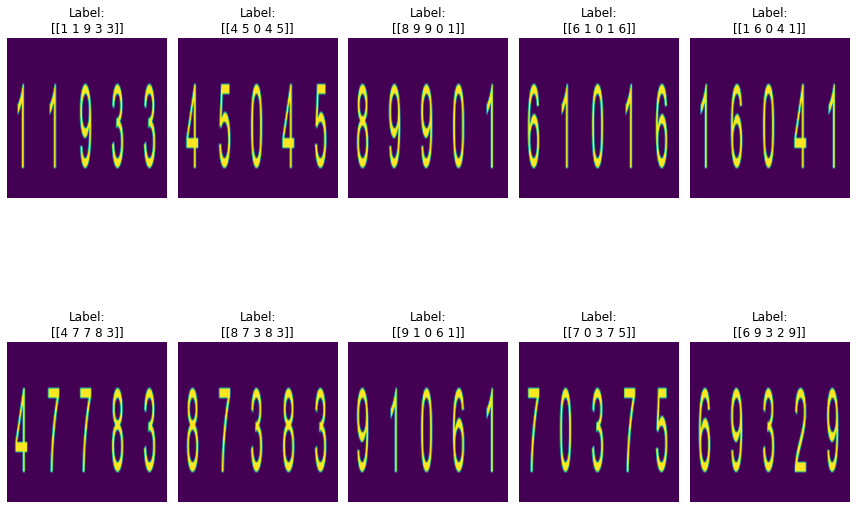

In [6]:
 from src.helpers import visualize_images
    
# Visualize 4 images from the training dataset
visualize_images(train_dataset, num_images=10)

### Image Augmentation

I applied the data augmentation method to the training dataset, introduces variations to the training samples, and makes the algorithm learn invariant representations of the images by using the transformations below: 
<ul> 
  <li><b>Random Brightness Adjustment:</b>is used to randomly adjust the brightness of the image. </li>

  <li><b>Rotation:</b>is used to rotate the image by a random angle.</li>

  <li><b>Random Crop:</b>is applied to randomly crop the image.</li>

  <li><b>Shear Transformation:</b>is used to apply a shear transformation to the image.</li>

  <li><b>Contrast Adjustment:</b>is used to randomly adjust the contrast of the image.</li>

  <li><b>Gaussian Noise:</b>Add Gaussian noise to the image.</li>

  <li><b>Clipping Pixel Values:</b>to clip the pixel values of the image to the range of [0,1]. This ensures that the pixel values stay within a valid range after applying transformations. </li>
</ul>

We don't want our model to change its prediction based on the transformations above. Data augmentation improves the model's generalization ability, avoids overfitting and shortcut learning, and most importantly increases the number of our training dataset. With this, I created 54000 augmented samples, and this was combined with the original training samples to amount to a total of 64800 training samples. This helps the model learn from both the original and augmented versions of the data, enhancing its ability to handle variations and improve performance.

In [7]:
!pytest -vv src/helpers.py -k test_augment_data

============================= test session starts ==============================
platform linux -- Python 3.8.8, pytest-7.1.1, pluggy-0.13.1 -- /home/ubuntu/anaconda3/bin/python
cachedir: .pytest_cache
rootdir: /home/ubuntu/OCR
plugins: anyio-2.2.0, typeguard-2.13.3
collected 3 items / 2 deselected / 1 selected                                  

src/helpers.py::test_augment_data PASSED                                 [100%]

=============================== warnings summary ===============================
../anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:22
  /home/ubuntu/anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:22: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
    import imp

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================== 1 passed, 2 deselected, 1 warning in 3.10s ==================


In [3]:
from src.helpers import augment_data
import tensorflow as tf

# Apply data augmentation to the training dataset
num_augmentations = 5  # Number of augmented versions to generate for each sample
augmented_train_dataset = train_dataset.flat_map(lambda image, label: tf.data.Dataset.from_tensor_slices(augment_data(image, label, num_augmentations)))

In [9]:
num_training_samples = augmented_train_dataset.reduce(0, lambda count, _: count + 1).numpy()
print("Number of augmented samples:", num_training_samples)

Number of augmented samples: 54000


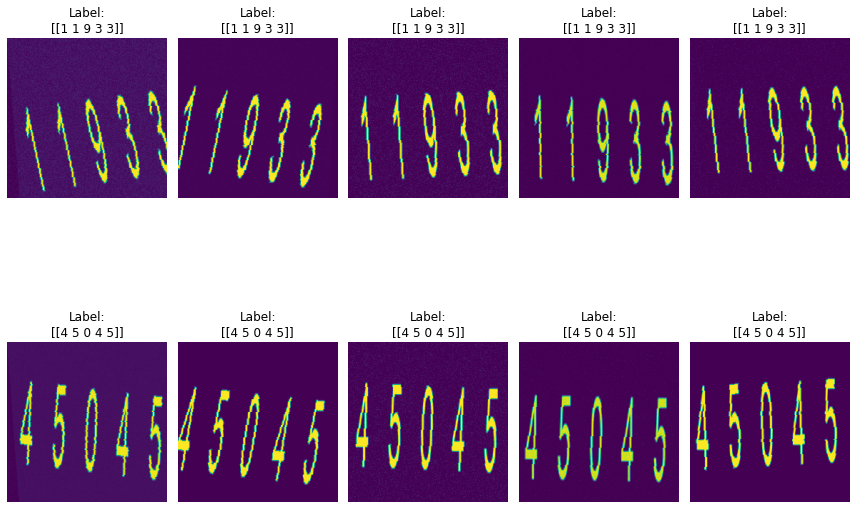

In [10]:
# Visualize 2 images from the data augmentation training dataset
visualize_images(augmented_train_dataset, num_images=10)

In [4]:
# Combine the original and augmented datasets
combined_train_dataset = train_dataset.concatenate(augmented_train_dataset)

In [12]:
# Number of combined training images
num_combined_train_images = combined_train_dataset.reduce(0, lambda count, _: count + 1).numpy()

# Number of combined training labels
num_combined_train_labels = combined_train_dataset.reduce(0, lambda count, _: count + 1).numpy()

# Shape of combined train_images
combined_train_images_shape = next(iter(combined_train_dataset))[0].shape

# Shape of combined train_labels
combined_train_labels_shape = next(iter(combined_train_dataset))[1].shape

print("Number of combined training images:", num_combined_train_images)
print("Number of combined training labels:", num_combined_train_labels)
print("Shape of combined train_images:", combined_train_images_shape)
print("Shape of combined train_labels:", combined_train_labels_shape)


Number of combined training images: 64800
Number of combined training labels: 64800
Shape of combined train_images: (224, 224, 1)
Shape of combined train_labels: (5,)


### Building the model:

#### Convolutional Recurrent Neural Network

I used the Convolutional Recurrent Neural Network architecture for this project and the reason behind the selection of the CRNN is that the combination of these two architectures can capture the spatial information of the image and the dependencies between the digits and generate an output sequence according to the label. To be more specific, I take  advantage of the power of convolutional neural networks to extract the relevant features or knowledge from the image and  also that of LSTMs for sequence generation, and this makes it well-suited for this OCR task involving multi-digit recognition.

 Here are other layers that I used in the architecture that are beneficial for this OCR:
 <ul>
    <li><b>Time-Distributed Layers for Handling Sequential Data:</b>I use the TimeDistributed layers  to process each time step (digit) independently. Applying Dense layers to each time step will enable  the model to consider the specific features of each digit and make the right predictions. </li>

   <li><b>Repeated Vector for Sequence Input: </b> The RepeatVector layer repeats the flattened vector to create a sequence input for the LSTM layer. This ensures that the LSTM receives a sequence of vectors representing the flattened image features, enabling it to generate a corresponding sequence of outputs.</li>

   <li><b>Softmax Activation for Classification:</b>The final Dense layer in the TimeDistributed layer applies the softmax activation function. This activation output values into a probability distribution over the classes, allowing the model to predict the probability of each digit at each time step.</li>

   <li><b></b></li>

 </ul>
All of these layers were stacked together sequentially and the total number of both trainable and non-trainable parameters amounted to 100,955,402. 

In [5]:
from src.cnnmodel import  create_rnn_model


input_shape = (224, 224, 1)
num_classes = 10
model = create_rnn_model(input_shape, num_classes)

In [7]:
import os

checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                            save_weights_only=True,
                                                 verbose=1)

# Compile the model
lr = 0.001
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [8]:
# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 394272)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 5, 64)             100950272 
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 64)             4160      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 10)             6

### Training Process

<ul>
  <li><b> Model Compilation:</b>The model weights are saved using a checkpoint callback. The model is compiled with the Adam optimizer using a learning rate of 0.001. The loss function used is SparseCategoricalCrossentropy, and accuracy is chosen as the evaluation metric.</li>

  <li><b>Dataset Batching:</b>The training dataset is batched with a batch size of 128, and the prefetch function is utilized to optimize data preprocessing and model execution. The validation dataset is also batched using the same batch size.
     </li>

  <li><b>Model Training:</b>I trained the  model  for 10 epochs using the fit function. The progress of each epoch is displayed, including the loss and accuracy values for both the training and validation datasets. </li>
</ul>

In [9]:
# Create batches for training dataset
batch_size = 128
train_dataset_batch = combined_train_dataset.batch(batch_size)
train_dataset_batch = train_dataset_batch.prefetch(buffer_size=tf.data.AUTOTUNE)

# Create batches for test dataset
validation_dataset_batch = validation_dataset.batch(batch_size)

In [10]:
# Train the model
history = model.fit(train_dataset_batch, epochs=10, validation_data=validation_dataset_batch,callbacks=[cp_callback])

Epoch 1/10
507/507 [==============================] - 136s 252ms/step - loss: 2.1871 - accuracy: 0.2731 - val_loss: 2.0206 - val_accuracy: 0.4525

Epoch 00001: saving model to checkpoints/cp.ckpt
Epoch 2/10
507/507 [==============================] - 128s 253ms/step - loss: 1.9630 - accuracy: 0.5185 - val_loss: 1.7237 - val_accuracy: 0.7567

Epoch 00002: saving model to checkpoints/cp.ckpt
Epoch 3/10
507/507 [==============================] - 128s 253ms/step - loss: 1.7374 - accuracy: 0.7518 - val_loss: 1.4916 - val_accuracy: 0.9860

Epoch 00003: saving model to checkpoints/cp.ckpt
Epoch 4/10
507/507 [==============================] - 127s 250ms/step - loss: 1.5612 - accuracy: 0.9238 - val_loss: 1.4630 - val_accuracy: 0.9998

Epoch 00004: saving model to checkpoints/cp.ckpt
Epoch 5/10
507/507 [==============================] - 129s 254ms/step - loss: 1.5043 - accuracy: 0.9710 - val_loss: 1.4617 - val_accuracy: 1.0000

Epoch 00005: saving model to checkpoints/cp.ckpt
Epoch 6/10
507/507 [

In [18]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'rnn_model', 'checkpoint', 'cp.ckpt.index']

In [12]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

### Display Losses and accuracies 


/home/ubuntu/OCR/src/helpers.py:226: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


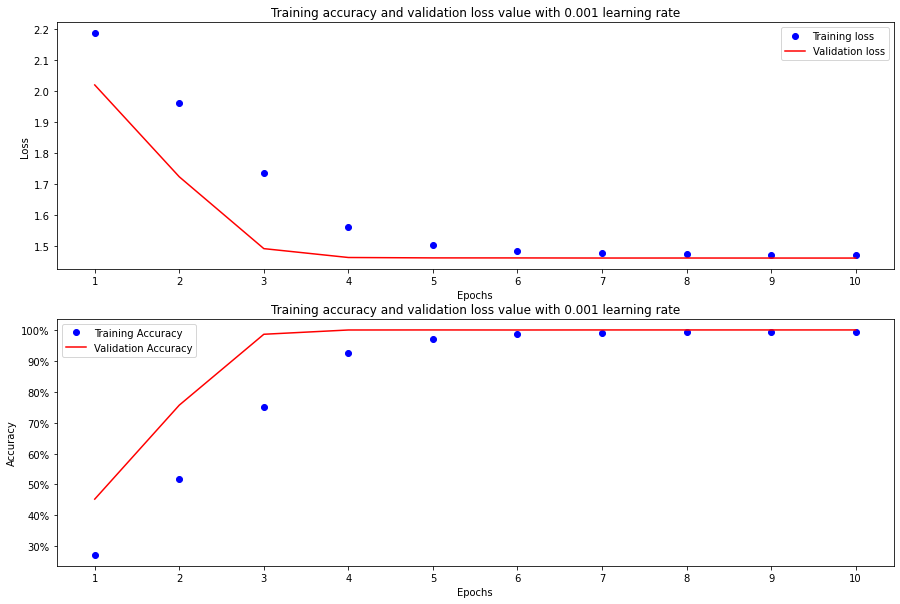

In [13]:
from src.helpers import display
display(tr_loss,val_loss,tr_acc,val_acc,lr)

### Result
The training results demonstrate the model's performance over 10 epochs. As the training progressed, the loss decreased and accuracy improved for both the training and validation datasets. The final validation accuracy achieved a perfect score of 1.0000. Finally, the trained model achieved a perfect accuracy score of 100 percent on the test set generated. 

In [1]:
from src.helpers import generate_test_images

test_dataset = generate_test_images(20)

In [2]:
for i,_ in test_dataset:
    print(i.shape,_.shape)
    break

(224, 224, 1) (5,)


In [8]:
from src.cnnmodel import  create_rnn_model


input_shape = (224, 224, 1)
num_classes = 10

# Create model instance
loaded_model = create_rnn_model(input_shape, num_classes)

checkpoint_path = "checkpoints/cp.ckpt"

# Loads the weights
loaded_model.load_weights(checkpoint_path)

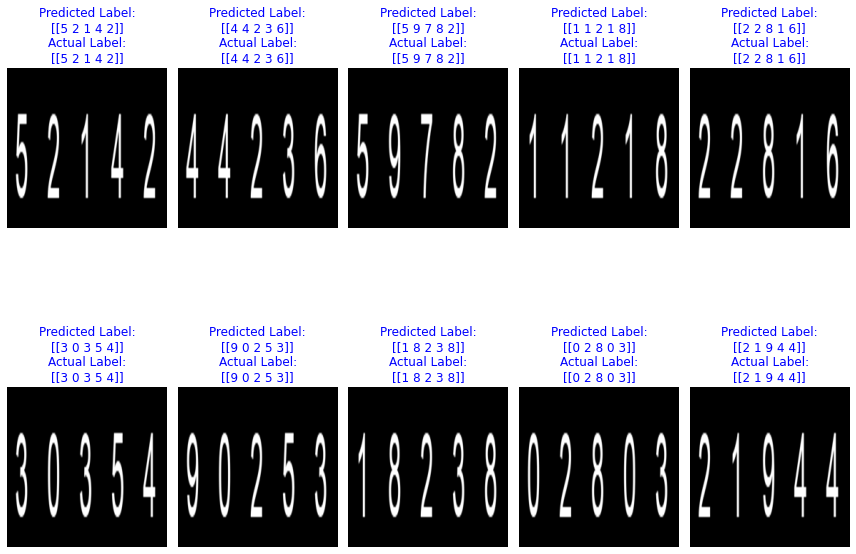

In [5]:
from src.helpers import visualize_predictions

visualize_predictions(test_dataset, num_images=10, model=loaded_model)

In [14]:
import tensorflow as tf


test_dataset_batch = test_dataset.batch(len(test_dataset))


# Compile the model
lr = 0.001

loaded_model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

loss, acc = loaded_model.evaluate(test_dataset_batch, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 - 1s - loss: 1.4613 - accuracy: 1.0000
Restored model, accuracy: 100.00%


### Summary and Conclusion

In this project, a CRNN model was trained to perform OCR on images containing five-digit sequences. The model architecture utilized a combination of convolutional and recurrent layers, enabling it to effectively capture spatial information and handle sequential data. Through the training process, the model exhibited significant learning and achieved remarkable accuracy in recognizing and classifying the digits. The trained model can be deployed for real-world applications involving OCR tasks on similar types of images.